In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the pokemon data set
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## 1.0 Faceting for Multivariate Data

FacetGrid could be used to subset your dataset across levels of a categorical variable, and then create one plot for each subset. Where the faceted plots demonstrated were univariate before, you can actually use any plot type, allowing you to facet bivariate plots to create a multivariate visualization.

In [43]:
# create a new column name 'type' that will have four variables
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, var_name = 'type_level', value_name = 'type').dropna()
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon', 'grass', 'poison'])]
pokemon_sub_df = pkmn_types.loc[pkmn_types['species'].isin(['bulbasaur', 'ivysaur', 'venusaur', 'ekans', 'arbok'])]

### 2.0 Faceting by Columns
> For faceting by columns, a categorical variable is passed as column (col) in the FacetGrid function.

#### 2.1 Plotting a Point Plot

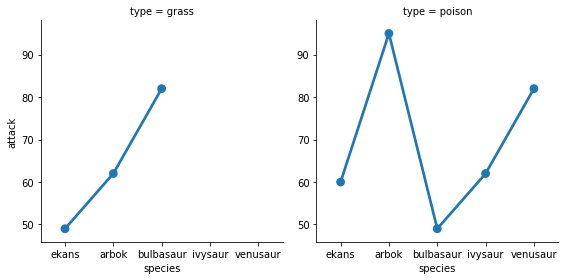

In [46]:
# Plot point graph using faceting by column
g = sb.FacetGrid(data = pokemon_sub_df, col = 'type', size = 4)# set col to a categorical variable
g.map(sb.pointplot, 'species', 'attack');

#### 2.2 Scatter Plot After Log Transformation
> Performing faceting by column and setting a categorical variable to the hue parameter.

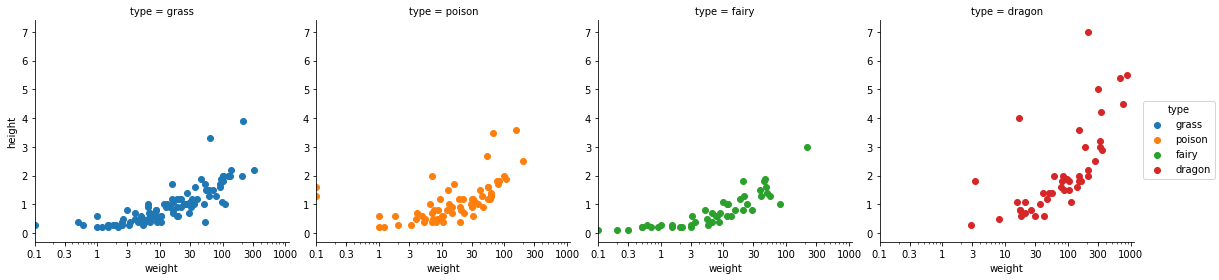

In [42]:
# plotting
g = sb.FacetGrid(data = pokemon_sub, col = 'type', hue = 'type', size = 4)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

### 3.0 Faceting by Column and Row

FacetGrid also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

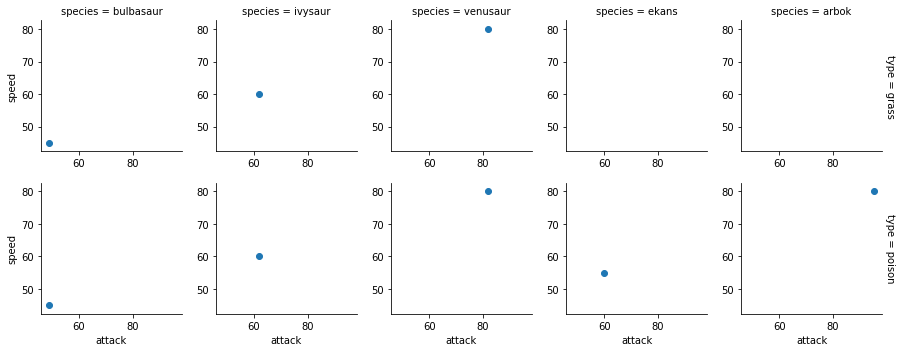

In [45]:
# Plot a scatter plot using faceting with column and row
g = sb.FacetGrid(data = pokemon_sub_df, col = 'species', row = 'type', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'attack', 'speed');

**Note**
> Setting ```margin_titles = True``` means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.